In [ ]:
#TATO SRANDA rozdeli video na segmenty o delce 2s s prekryvem 1s - dvousekundove segmenty skript zvladal nejlepe
from moviepy.editor import VideoFileClip
import os

# Umisteni videa
input_video_path = 'path_to_your_video.mp4'

# export adresar
output_directory = 'path_to_output_directory'


video = VideoFileClip(input_video_path)
fps = video.fps

segment_duration = 2
overlap_duration = 1

total_duration = video.duration


start_time = 0

segment_index = 0

while start_time < total_duration:
    end_time = start_time + segment_duration
    if end_time > total_duration:
        end_time = total_duration


    segment = video.subclip(start_time, end_time)


    output_path = os.path.join(output_directory, f'segment_{segment_index}.mp4')
    segment.write_videofile(output_path, codec='libx264')


    start_time += (segment_duration - overlap_duration)
    segment_index += 1

print('Video splitting completed.')

In [1]:
####Tahle sranda automaticky "prokapkaluje" vse v zadanem adresari, nejdriv je samozrejme nutne vse nechat projit scriptem kapkatrack (tj. staci zmenit command_template na prikaz
####Dle puvodniho navodu
import os
import glob
import subprocess

# Umisteni videi (a csv souboru)
video_directory = r'C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\300'

# Zde upravte, mate-li videa v AVI
video_pattern = os.path.join(video_directory, '*.mp4')


# Vypsani vsech nalezenych videi
video_files = glob.glob(video_pattern)
print(f'Found {len(video_files)} video files')

command_template = 'py kapkal.py {}'

relative_path = "splits/300/"
# ZDE ZADEJTE ADRESU KE SCRIPTU, tj adr. kapkatrack, kapkal.py a jine
os.chdir("C:/Users/Admin/Documents/Fyzikalni praktikum/3 - Milikanuv experiment/script/")



# Samotne spusteni prikazu
for video_file in video_files:
    video_file = os.path.basename(video_file)
    print(f'Processing video file: {video_file}')
    video_file = relative_path + video_file
    command = command_template.format(video_file)
    print(f'Running command: {command}')
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)


Found 64 video files
Processing video file: segment_0.mp4
Running command: py kapkal.py splits/300/segment_0.mp4
Processing splits/300/segment_0.mp4
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)
Drops: 0
Total drops found: 0
Filtered - x std: 0
Filtered - fit std: 0


Processing video file: segment_1.mp4
Running command: py kapkal.py splits/300/segment_1.mp4
Processing splits/300/segment_1.mp4
Figure(640x480)
Figure(640x480)
Figure(640x480)

Traceback (most recent call last):
  File "C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\kapkal.py", line 87, in <module>
    drops = drops_filter.analyze_drops(
        filtered_drops,
        inversion_frame
    )
  File "C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\drops_filter.py", line 141, in analyze_drops
    drop_result = self.analyze_drop(
        filtered_drops_data.frames,
        filtered_drops_data.x[:, i],
        filtered_drops_data.y[:, 

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import os
import glob

#Manualni kontrola vystupnich dat, profiltrovani - vse co dava smysl hodit do jedne slozky - tato cast pak vsetka CSVcka spoji do jednoho.
csv_directory = r'C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\500\use'



csv_pattern = os.path.join(csv_directory, '*.csv')


csv_files = glob.glob(csv_pattern)
print(f'Found {len(csv_files)} CSV files')


dataframes = []


for csv_file in csv_files:
    print(f'Processing CSV file: {csv_file}')
    if csv_file != 'combined.csv':
        df = pd.read_csv(csv_file)
        dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

delta = abs(combined_df["v1"] - combined_df["v2"])
combined_df["delta"] = delta


combined_csv_path = os.path.join(csv_directory, 'combined.csv')
combined_df.to_csv(combined_csv_path, index=False)
print(f'Combined CSV saved to: {combined_csv_path}')

Found 37 CSV files
Processing CSV file: C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\500\use\504.mp4_drops.csv
Processing CSV file: C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\500\use\506.mp4_drops.csv
Processing CSV file: C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\500\use\507.mp4_drops.csv
Processing CSV file: C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\500\use\508.mp4_drops.csv
Processing CSV file: C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\500\use\509.mp4_drops.csv
Processing CSV file: C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\500\use\510.mp4_drops.csv
Processing CSV file: C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\500\use\512.mp4_drops.csv
Processing CSV file: C:\Users\Admin\Documents\Fyzikalni praktiku

: 

In [194]:
import pandas as pd
import os
import glob
import numpy as np

#constants
nu = 1.81e-5  # m^2/s
rho = 1030
rhovz = 1.293
d =2.5e-3  # m
g = 9.81  # m/s^2
e = 1.602176634e-19

C1 = 9*nu/(4*g*(rho-rhovz))
C2 = 3*np.pi*nu*d
#720px = 0.89mm
#1px = 0.89mm/480 = 0.00089/720 = 1.236e-6 m
#1px = 1.236e-6 m
#speed is in px/FRAME
#framerate = 25fps 
def px_to_m(px):
    return px * 1.8541666e-6 * 25


#Manualni kontrola vystupnich dat, profiltrovani - vse co dava smysl hodit do jedne slozky - tato cast pak vsetka CSVcka spoji do jednoho.
data = []
for n in range(300, 650, 50):
    csv_directory = rf'C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\{n}\use'
    print(csv_directory)
    csv_pattern = os.path.join(csv_directory, 'combined.csv')
    csv_files = glob.glob(csv_pattern)
    print(f'Found {len(csv_files)} CSV files')
    df = pd.read_csv(csv_files[0])
    df["v1"] = df["v1"].apply(px_to_m) 
    df["v2"] = df["v2"].apply(px_to_m) 
    df["delta"] = df["delta"].apply(px_to_m)
    
    df.rename(columns={'v1': 'v1', 'v2': 'v2', 'delta': 'v1+v2'}, inplace=True)
    df["v1-v2"] = abs(abs(df["v1"]) - abs(df["v2"]))
    df["r"] = np.sqrt(df["v1-v2"]*C1)
    df["q"] = C2 * df["v1+v2"]*df["r"]/n
    df["odchylka"] = abs(((df["q"] / e)).round() - (df["q"] / e))
    #df = df[df["odchylka"] <= 0.05]
    df["n"] = (df["q"]/e).round()
    df["U"] = n
    data.append(df)
    #print(df)




combined_df = pd.concat(data, ignore_index=True)



combined_csv_path = os.path.join(csv_directory, 'FINAL.csv')
combined_df.to_csv(combined_csv_path, index=False)
print(f'Combined CSV saved to: {combined_csv_path}')

C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\300\use
Found 1 CSV files
C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\350\use
Found 1 CSV files
C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\400\use
Found 1 CSV files
C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\450\use
Found 1 CSV files
C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\500\use
Found 1 CSV files
C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\550\use
Found 1 CSV files
C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\600\use
Found 1 CSV files
Combined CSV saved to: C:\Users\Admin\Documents\Fyzikalni praktikum\3 - Milikanuv experiment\script\splits\600\use\FINAL.csv


Second derivative at best_e: -1.243e+02
Fitted e ≈ 2.146e-19 C
Uncertainty in e ≈ nan C


C:\Users\Admin\AppData\Local\Temp\ipykernel_13704\3154734426.py:37: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = np.sqrt(1 / second_derivative)


Slope: 1.721e-17, Intercept: -1.496e-36, Std Err: 7.098e-20
Polyfit minimum: 1.620e-19, uncertainties: ['1.473e+01']
Uncertainty in e (based on valley width): 1.455e-20 C


<Figure size 1000x600 with 0 Axes>

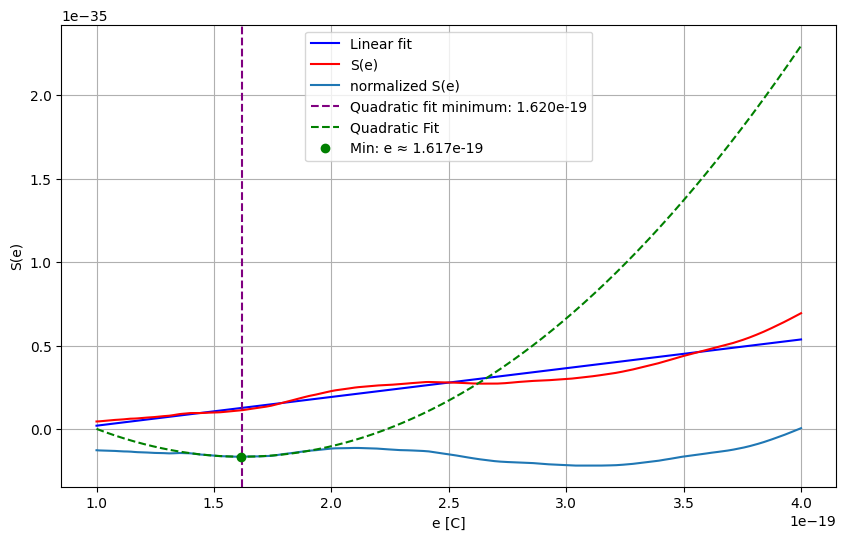

In [189]:
from scipy.stats import linregress
import numpy as np

from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from itertools import combinations

from scipy.optimize import minimize_scalar

#df = pd.read_csv(combined_csv_path)
df = combined_df  # assumes you've already loaded your DataFrame
#df = df[(df['q'] > 1e-20) & (df['q'] < 1e-18)]  # optional: filter bad values
q_values = df['q'].values



# --- Objective function: total squared residuals ---
def residual_sum_squares(e):
    if np.any(e <= 0):
        return np.inf
    n = np.round(q_values / e)
    q_fit = n * e
    residuals = q_values - q_fit
    return np.sum(residuals**2)

# --- Optimize ---
bouns = (1e-19, 4e-19)
res = minimize_scalar(residual_sum_squares, bounds=bouns, method='bounded')
best_e = res.x

# --- Calculate uncertainty ---
# Uncertainty is estimated using the curvature of the residual sum of squares function
h = 1e-19 # Small step size for numerical differentiation
second_derivative = (residual_sum_squares(best_e + h) - 2 * residual_sum_squares(best_e) + residual_sum_squares(best_e - h)) / h**2
print(f"Second derivative at best_e: {second_derivative:.3e}")
uncertainty = np.sqrt(1 / second_derivative)

print(f"Fitted e ≈ {best_e:.3e} C")
print(f"Uncertainty in e ≈ {uncertainty:.3e} C")

plt.figure(figsize=(10, 6))
e_vals = np.linspace(bouns[0], bouns[1], 5000)
S_vals = [residual_sum_squares(e) for e in e_vals]
S_vals2 = np.array([residual_sum_squares(e) for e in e_vals])

slope, intercept, r_value, p_value, std_err = linregress(e_vals, S_vals2)
print(f"Slope: {slope:.3e}, Intercept: {intercept:.3e}, Std Err: {std_err:.3e}")
plt.figure(figsize=(10, 6))


plt.plot(e_vals, e_vals*slope + intercept , 'b', label='Linear fit')
plt.plot(e_vals, S_vals, 'r', label='S(e)')
plt.plot(e_vals, S_vals - (slope*e_vals), label = "normalized S(e)")
S_norm = S_vals - (slope*e_vals)


# Find the absolute minimum of the normalized S(e), search just between 1.4e-19 and 1.8e-19


# Restrict the range of e_vals to (1.4e-19, 1.8e-19)
restricted_mask = (e_vals >= 1.4e-19) & (e_vals <= 1.8e-19)
restricted_e_vals = e_vals[restricted_mask]
restricted_S_norm = S_norm[restricted_mask]

# Find the absolute minimum of the normalized S(e) in the restricted range
absolute_min_index = np.argmin(restricted_S_norm)
absolute_min_e = restricted_e_vals[absolute_min_index]
absolute_min_value = restricted_S_norm[absolute_min_index]
S_threshold = absolute_min_value + 1e-37

# Find the interval where S_norm < S_min + threshold in the restricted range
within_threshold_indices = np.where(restricted_S_norm < S_threshold)[0]

# Calculate uncertainty as half the width of the valley in the restricted range
if len(within_threshold_indices) >= 2:
    left_index = within_threshold_indices[0]
    right_index = within_threshold_indices[-1]
    e_left = restricted_e_vals[left_index]
    e_right = restricted_e_vals[right_index]
    uncertainty_width = (e_right - e_left) / 2
else:
    uncertainty_width = np.nan



# Fit a quadratic function to the normalized S(e)
valley_mask = (e_vals >= 1.4e-19) & (e_vals <= 1.8e-19)
e_valley = e_vals[valley_mask]
S_valley = S_norm[valley_mask]



# Fit a quadratic function to the normalized S(e)
quadratic_coeffs = np.polyfit(e_valley, S_valley, 2)
quadratic_fit = np.poly1d(quadratic_coeffs)

# Find the minimum of the quadratic fit
minimum = -quadratic_coeffs[1] / (2 * quadratic_coeffs[0])

# Calculate uncertainties for the minimum
uncertainties = [np.sqrt(1 / 2*abs(quadratic_coeffs[0]))]


print (f"Polyfit minimum: {minimum:.3e}, uncertainties: {[f'{u:.3e}' for u in uncertainties]}")
plt.axvline(x=minimum, color='purple', linestyle='--', label=f'Quadratic fit minimum: {minimum:.3e}')

# Plot the quadratic approximation
plt.plot(e_vals, quadratic_fit(e_vals), 'g--', label='Quadratic Fit')
plt.legend()

print (f"Uncertainty in e (based on valley width): {uncertainty_width:.3e} C")
#print (f"Absolute minimum of S(e): {absolute_min_value:.3e} at e ≈ {absolute_min_e:.3e} C")
# Plot the absolute minimum
plt.plot(absolute_min_e, absolute_min_value, 'go', label=f'Min: e ≈ {absolute_min_e:.3e}')
plt.legend()
plt.xlabel("e [C]")
plt.ylabel("S(e)")
plt.grid()
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_13704\887671749.py:2: RuntimeWarning: divide by zero encountered in divide
  e_estimates = q_values / n
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13704\887671749.py:43: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(gauss, x_data, y_data, p0=[np.max(y_data), px, 1e-20])


Peak positions (q): [1.31250e-19 2.01250e-19 3.23750e-19 4.81250e-19 8.66250e-19 1.04125e-18] ± [np.float64(3.7215149724391724e-20), np.float64(1.641710801578937e-20), np.float64(7.186345542402926e-20), np.float64(5.958358786740722e-20), np.float64(5.2492778300187396e-20), np.float64(3.6295991913860764e-20)]


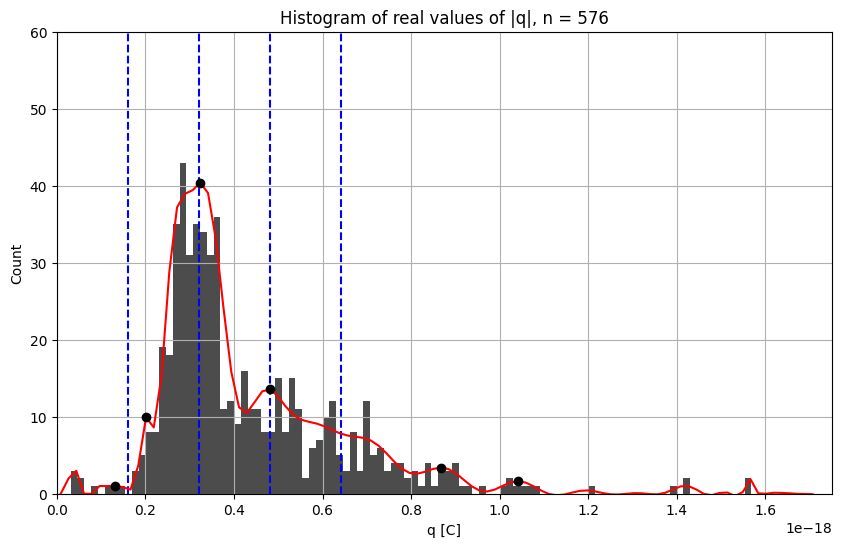

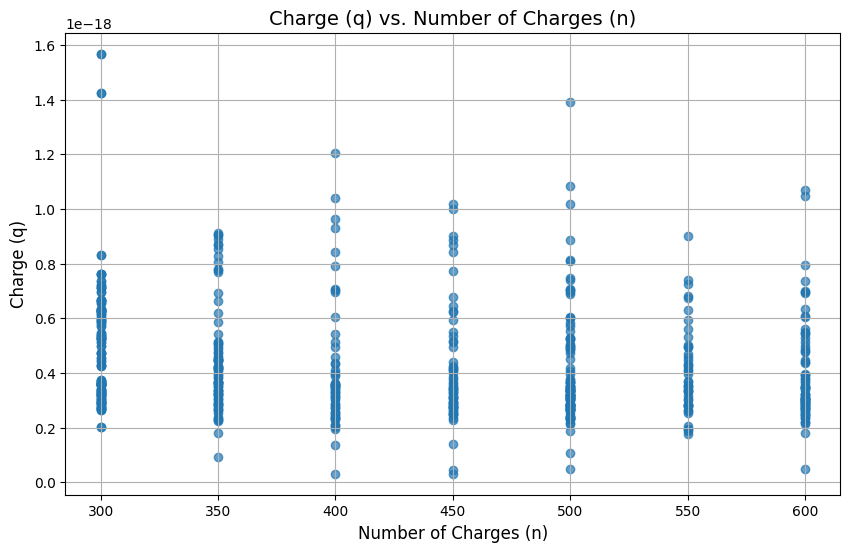

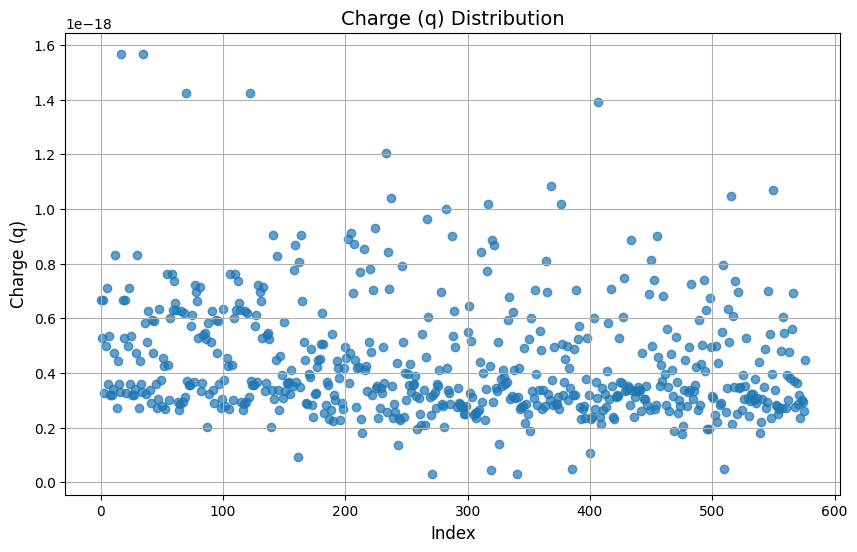

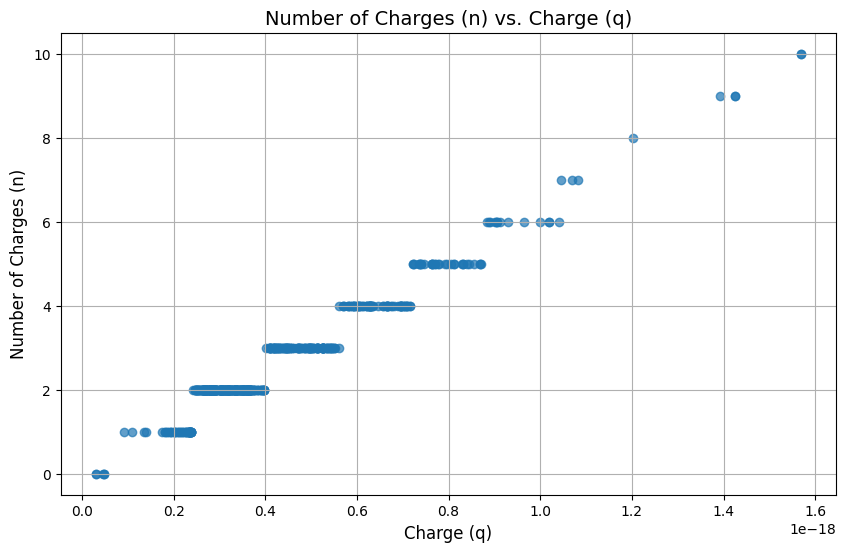

Slope (e): 1.53e-19
R-squared: 0.96
Uncertainty in slope (e): 1.32e-21


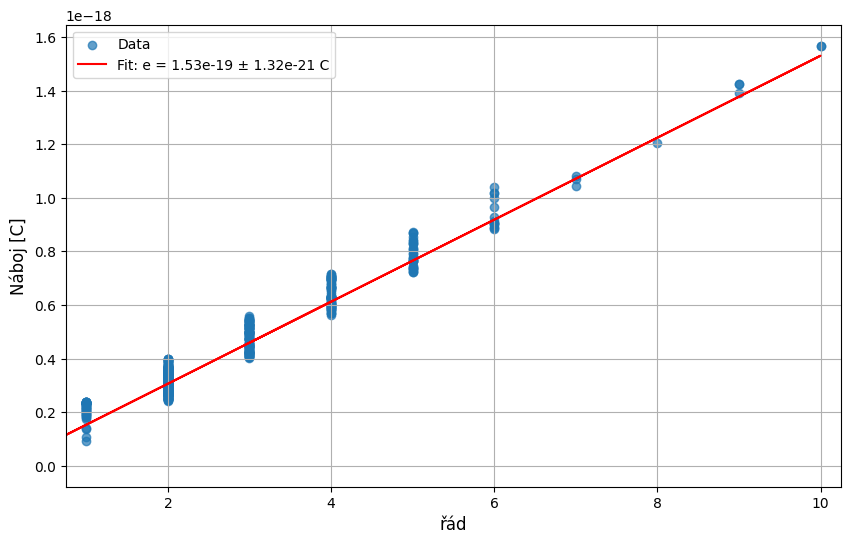

In [170]:
# --- Histogram of q_i / n_i to verify ---
e_estimates = q_values / n
plt.figure(figsize=(10, 6))
plt.hist(q_values, bins=100, color='black', alpha=0.7, label="Measured q")
plt.axvline(x=1.602e-19, color='b', linestyle='--', label="q = e")
plt.axvline(x=1.602176634e-19*2, color='b', linestyle='--', label="q = 2*e")
plt.axvline(x=1.602176634e-19*3, color='b', linestyle='--', label="q = 3*e")
plt.axvline(x=1.602176634e-19*4, color='b', linestyle='--', label="q = 4*e")

# --- Compute histogram (for polynomial fit only on q_noisy) ---
counts, bin_edges = np.histogram(q_values, bins=100, range=(0, 1.75e-18))
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# --- Fit 2500th-order polynomial to histogram ---
p7 = Polynomial.fit(bin_centers, counts, deg=25000, domain=[0, 1.75e-18])
p7_vals = p7(bin_centers)

# --- Find local maxima on the polynomial curve ---
# Filter the bin centers and polynomial values to the specified range
mask = (bin_centers >= 0.1e-18) & (bin_centers <= 1.2e-18)
filtered_bin_centers = bin_centers[mask]
filtered_p7_vals = p7_vals[mask]
# Find peaks within the filtered range
peaks, _ = find_peaks(filtered_p7_vals)
peak_positions = filtered_bin_centers[peaks]
peak_heights = filtered_p7_vals[peaks]

# Calculate uncertainties for each peak
uncertainties = [] #????????????????????
from scipy.optimize import curve_fit

def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

for px in peak_positions:
    # Slice a small window around each peak
    window_mask = (filtered_bin_centers > px - 3e-20) & (filtered_bin_centers < px + 3e-20)
    x_data = filtered_bin_centers[window_mask]
    y_data = filtered_p7_vals[window_mask]

    # Initial guess: A=max, mu=center, sigma=width guess
    try:
        popt, _ = curve_fit(gauss, x_data, y_data, p0=[np.max(y_data), px, 1e-20])
        _, mu, sigma = popt
        uncertainties.append(sigma)
    except RuntimeError:
        uncertainties.append(np.nan)

print("Peak positions (q):", peak_positions, "±", uncertainties)



# Plot the polynomial fit and peaks
plt.plot(bin_centers, p7_vals, 'r-', label='7th order polynomial fit')
plt.plot(peak_positions, peak_heights, 'ko', label='Local maxima (fit)')

plt.xlim(0, 1.75e-18)
plt.ylim(0, 60)


plt.xlabel("q [C]")
plt.ylabel("Count")
plt.title("Histogram of real values of |q|, n = 576")
plt.grid()
plt.show()





#--------------------

plt.figure(figsize=(10, 6))
plt.scatter(df['U'], df['q'], alpha=0.7)
plt.title('Charge (q) vs. Number of Charges (n)', fontsize=14)
plt.xlabel('Number of Charges (n)', fontsize=12)
plt.ylabel('Charge (q)', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(df['q'])), df['q'], alpha=0.7)
plt.title('Charge (q) Distribution', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Charge (q)', fontsize=12)
plt.grid(True)
plt.show()

# n * e = 3 * pi * nu * r * d * (v1+v2) / E)
# k = 3*pi*nu*d*r
# n * e = k * (v1+v2) / E
plt.figure(figsize=(10, 6))
plt.scatter(df['q'], df['n'], alpha=0.7)
plt.title('Number of Charges (n) vs. Charge (q)', fontsize=14)
plt.xlabel('Charge (q)', fontsize=12)
plt.ylabel('Number of Charges (n)', fontsize=12)
plt.grid(True)
plt.show()
# Perform linear regression
slope, _, r_value, _, std_err = linregress(df['n'], df['q'])

# Plot the linear fit
plt.figure(figsize=(10, 6))
plt.scatter(df['n'], df['q'], alpha=0.7, label='Data')
plt.plot(df['n'],  slope * df['n'], color='red', label=f'Fit: e = {slope:.2e} ± {std_err:.2e} C')
plt.xlabel('řád', fontsize=12)
plt.ylabel('Náboj [C]', fontsize=12)
plt.xlim(0.75,10.25)
plt.grid(True)
print(f"Slope (e): {slope:.2e}")
print(f"R-squared: {r_value**2:.2f}")
print(f"Uncertainty in slope (e): {std_err:.2e}")
plt.legend()

plt.show()

In [24]:
from uncertainties import ufloat
q2 = ufloat(3.23750e-19, 0.3e-19)
q3 = ufloat(4.81250e-19, 0.3e-19)
e = (q2+q3)/5
print(e)

(1.61+/-0.08)e-19


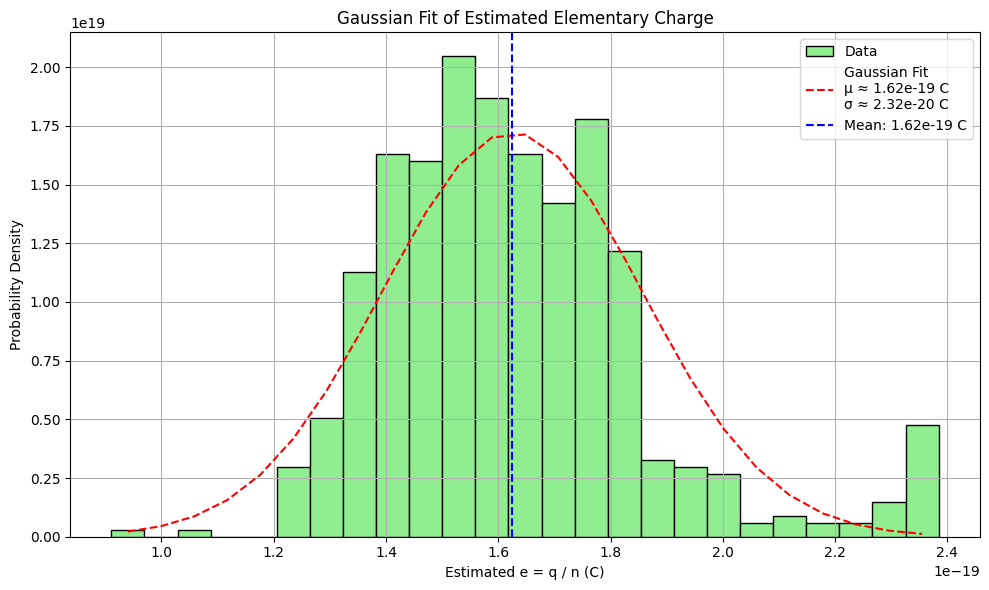

(np.float64(1.6248926544218738e-19),
 np.float64(2.3172021636374513e-20),
 np.float64(0.14260647663903045))

In [195]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Recalculate from uploaded file
df = combined_df
q = df['q'].values
n = df['n'].values
valid_mask = (n > 0) & np.isfinite(n)
q_valid = q[valid_mask]
n_valid = n[valid_mask]

# Estimate e
e_estimates = q_valid / n_valid
e_mean = np.mean(e_estimates)
e_std = np.std(e_estimates)
relative_noise = e_std / e_mean

# Gaussian fit
hist_vals, bin_edges = np.histogram(e_estimates, bins=25, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
popt = norm.fit(e_estimates)  # returns mu, sigma
pdf_fitted = norm.pdf(bin_centers, *popt)

# Plot
plt.figure(figsize=(10, 6))
plt.hist(e_estimates, bins=25, color='lightgreen', edgecolor='black', density=True, label="Data")
plt.plot(bin_centers, pdf_fitted, 'r--', label=f'Gaussian Fit\nμ ≈ {popt[0]:.2e} C\nσ ≈ {popt[1]:.2e} C')
plt.axvline(popt[0], color='blue', linestyle='--', label=f'Mean: {popt[0]:.2e} C')
plt.xlabel("Estimated e = q / n (C)")
plt.ylabel("Probability Density")
plt.title("Gaussian Fit of Estimated Elementary Charge")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

popt[0], popt[1], popt[1] / popt[0]  # mean, std, relative noise


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


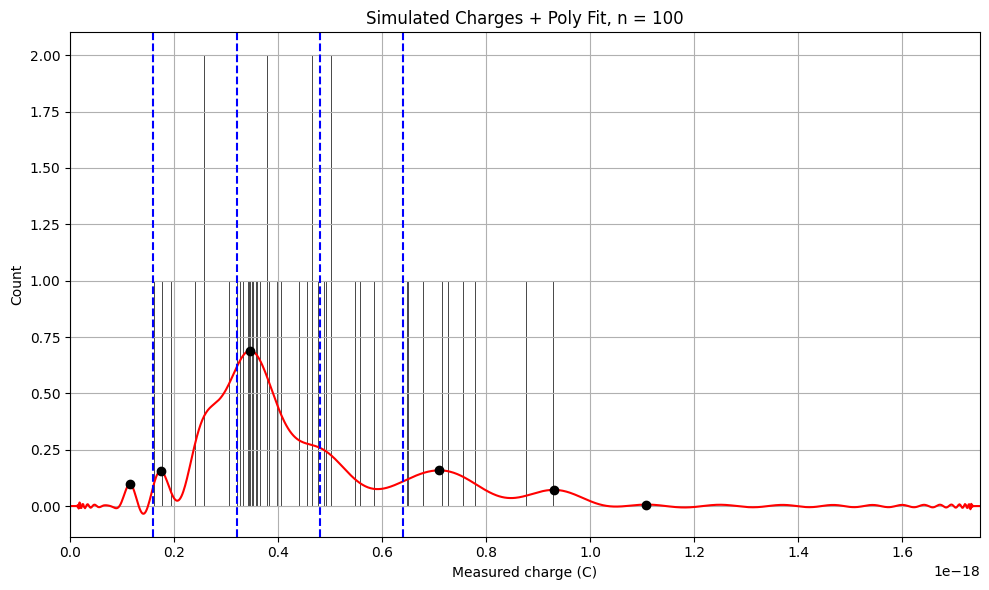

Peak positions (C):
Peak 1: 1.146e-19 C
Peak 2: 1.741e-19 C
Peak 3: 3.456e-19 C
Peak 4: 7.096e-19 C
Peak 5: 9.301e-19 C
Peak 6: 1.109e-18 C
average peak position: 


  0%|          | 0/9 [00:00<?, ?it/s]

100
Peak positions (C):
average peak position: 
nan nan


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13704\3054909532.py:165: RuntimeWarning: Mean of empty slice.
  peak_avg = peaks_array.mean()
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Admin\AppData\Local\Pr

200
Peak positions (C):
average peak position: 
nan nan


 22%|██▏       | 2/9 [00:01<00:04,  1.63it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


300
Peak positions (C):
average peak position: 
nan nan


 33%|███▎      | 3/9 [00:01<00:03,  1.61it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


400
Peak positions (C):
average peak position: 
nan nan


 44%|████▍     | 4/9 [00:02<00:03,  1.64it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


500
Peak positions (C):
average peak position: 
nan nan


 56%|█████▌    | 5/9 [00:03<00:02,  1.44it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


600
Peak positions (C):
average peak position: 
nan nan


 67%|██████▋   | 6/9 [00:03<00:01,  1.50it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


700
Peak positions (C):
average peak position: 
nan nan


 78%|███████▊  | 7/9 [00:04<00:01,  1.56it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


800
Peak positions (C):
average peak position: 
nan nan


 89%|████████▉ | 8/9 [00:05<00:00,  1.60it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


900
Peak positions (C):
average peak position: 
nan nan


100%|██████████| 9/9 [00:05<00:00,  1.58it/s]


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

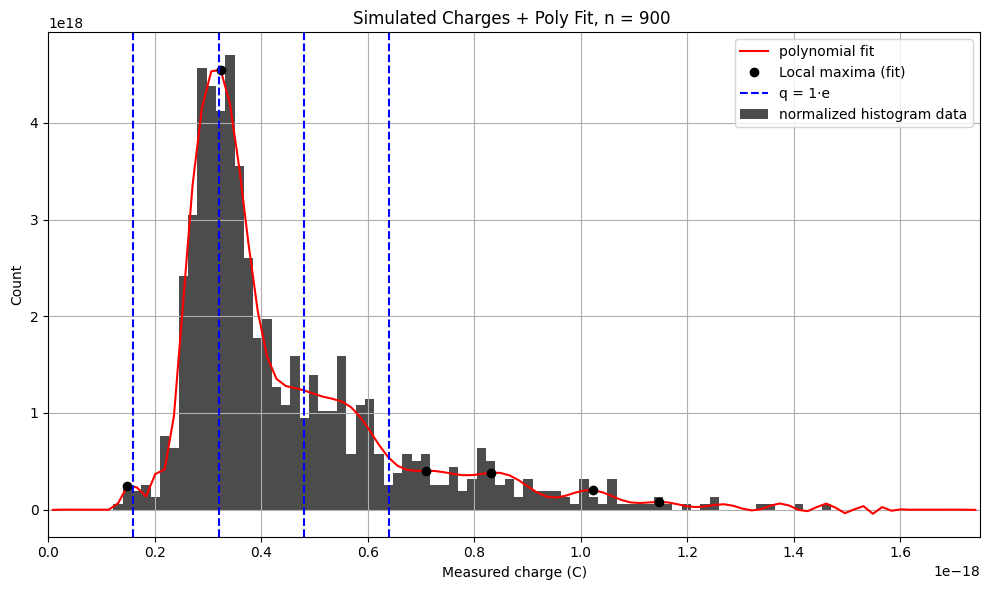

In [185]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from tqdm import tqdm

# --- Settings ---
true_e = 1.602e-19
n_drops = 100
noise_std = 0.1630  # Realistic noise level

# --- Relative charge distribution ---
n_levels = np.array([1, 2, 3, 4, 5, 6, 7, 8])
relative_counts = np.array([5, 288, 113, 72, 31, 14, 3, 1])
probabilities = relative_counts / relative_counts.sum()

# --- Sample charges ---
n_values = np.random.choice(n_levels, size=n_drops, p=probabilities)
q_ideal = n_values * true_e
#n_values2 = np.random.choice(n_levels, size=int(n_drops/1000), p=probabilities)
#q_ideal2 = n_values2 * true_e

# --- Add noise ---
q_noisy = q_ideal + np.random.normal(scale=noise_std * q_ideal, size=n_drops)
#q_noisy2 = q_ideal2 + np.random.normal(scale=noise_std * q_ideal2, size=int(n_drops/1000))
combined_df = pd.DataFrame({'q': q_noisy,})
combined_df["n"] = n_values

# --- Compute histogram (for polynomial fit only on q_noisy) ---
counts, bin_edges = np.histogram(q_noisy, bins=1000, range=(0, 1.75e-18))
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# --- Fit 7th-order polynomial to histogram ---
p7 = Polynomial.fit(bin_centers, counts, deg=25000, domain=[0, 1.75e-18])
p7_vals = p7(bin_centers)

# --- Find local maxima on the polynomial curve ---
# Filter the bin centers and polynomial values to the specified range
mask = (bin_centers >= 0.1e-18) & (bin_centers <= 1.2e-18)
filtered_bin_centers = bin_centers[mask]
filtered_p7_vals = p7_vals[mask]

# Find peaks within the filtered range
peaks, _ = find_peaks(filtered_p7_vals)
peak_positions = filtered_bin_centers[peaks]
peak_heights = filtered_p7_vals[peaks]

# --- Plot all ---
plt.figure(figsize=(10, 6))
plt.hist(q_noisy, bins=1000, color='black', alpha=0.7, label='q_noisy')
#plt.hist(q_noisy2, bins=100, color='blue', alpha=0.7, label='q_noisy2')

# Plot the polynomial fit and peaks
plt.plot(bin_centers, p7_vals, 'r-', label='7th order polynomial fit')
plt.plot(peak_positions, peak_heights, 'ko', label='Local maxima (fit)')

# Reference verticals
for i in range(1, 5):
    plt.axvline(x=true_e * i, color='b', linestyle='--', label=f"q = {i}·e" if i == 1 else None)

plt.xlim(0, 1.75e-18)
plt.xlabel("Measured charge (C)")
plt.ylabel("Count")
plt.title(f"Simulated Charges + Poly Fit, n = {n_drops}")
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print peak positions
print("Peak positions (C):")
peaks = []
for i, peak in enumerate(peak_positions):

    print(f"Peak {i+1}: {peak:.3e} C")
    peaks.append(peak)
print("average peak position: ")
#peaks = 1* peaks[0] + 2* peaks[1] + 3* peaks[2] + 4* peaks[3]....
#peak_avg = (peaks[0] + peaks[1] + peaks[2]) /6
#print(peak_avg)

#datae = []
#datae.append(("number", "peak1", "peak2", "peak3", "average_peak", "std_peak"))

#ITERATIONS FOR PEAK FITTING
for n_drops in tqdm(np.arange(100, 1000, 100)):
    
    plt.cla()  # Clear the current axes
    plt.close()  # Close the current figure
    plt.figure(figsize=(10, 6))
    print(n_drops)

    # --- Sample charges ---
    n_values = np.random.choice(n_levels, size=int(n_drops), p=probabilities)
    q_ideal = n_values * true_e

    # --- Add noise ---
    q_noisy = q_ideal + np.random.normal(scale=noise_std * q_ideal, size=int(n_drops))

    # --- Compute histogram (for polynomial fit only on q_noisy) ---
    counts, bin_edges = np.histogram(q_noisy, bins=100, range=(0, 1.75e-18))
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # --- Fit 7th-order polynomial to histogram ---
    p7 = Polynomial.fit(bin_centers, counts, deg=2500, domain=[0, 1.75e-18])
    p7_vals = p7(bin_centers)
    # Normalize the polynomial so its integral over the domain equals 1
    
    
    # Normalize the histogram counts so that the area under the histogram equals 1
    hist_integral = np.sum(counts * np.diff(bin_edges))
    counts_normalized = counts / hist_integral

    # Update the polynomial fit to match the normalized histogram
    p7_vals_normalized = p7_vals / hist_integral
    #normalise the q_noisy to the histogram
    k = q_noisy.max() / p7_vals_normalized.max()
    q_noisy_normalized = q_noisy / k



    # --- Find local maxima on the polynomial curve ---
    # Filter the bin centers and polynomial values to the specified range
    mask = (bin_centers >= 0.13e-18) & (bin_centers <= 1.2e-18)
    filtered_bin_centers = bin_centers[mask]
    filtered_p7_vals = p7_vals_normalized[mask]

    # Find peaks within the filtered range
    peaks, _ = find_peaks(filtered_p7_vals)
    peak_positions = filtered_bin_centers[peaks]
    peak_heights = filtered_p7_vals[peaks]
    # Optional: print peak positions
    print("Peak positions (C):")
    peaks = []
    
    for i, peak in enumerate(peak_positions):

        peaks.append(peak)
    print("average peak position: ")
    
    #peaks = 1* peaks[0] + 2* peaks[1] + 3* peaks[2] + 4* peaks[3]....
    if peaks and peaks[0] < 1.5e-19:
        peaks.pop(0)
    
    # Ensure we iterate over a copy of the list to avoid modifying it while iterating
    peaks_copy = peaks[:]
    mask = np.zeros(len(peaks), dtype=bool)
    for i in range(len(peaks_copy)):
        if abs(peaks[i] - 1.602e-19 * (i + 1))/(i+1) > 6-20:
            mask[i] = True
        if i> 3:
            mask[i] = True
    peaks = np.array(peaks)[~mask]
    
    for i in range(len(peaks)):
        peaks[i] = peaks[i] / (i + 1)
        print(f"Peak {i+1}: {peaks[i]:.3e} C")
   


    
    
    peaks_array = np.array(peaks)  # Convert the list to a NumPy array
    peaks_array = peaks_array[:3]
    peak_avg = peaks_array.mean()
    peak_std = peaks_array.std()
    print(peak_avg, peak_std)
    num_peaks = len(peaks_array)
    if num_peaks <= 2:
        peaks_array = np.append(peaks_array, np.nan)
        if num_peaks <= 1:
            peaks_array = np.append(peaks_array, np.nan)
            if num_peaks == 0:
                peaks_array = np.append(peaks_array, np.nan)
        
        
        peak_std = np.nan
    #datae.append((n_drops, peaks_array[0], peaks_array[1], peaks_array[2], peak_avg, peak_std))

    # --- Plot all ---
    plt.figure(figsize=(10, 6))
    # Normalize the histogram counts so that the area under the histogram equals 1
    hist_integral = np.sum(counts * np.diff(bin_edges))
    counts_normalized = counts / hist_integral

    # Plot the normalized histogram
    plt.bar(bin_centers, counts_normalized, width=np.diff(bin_edges), color='black', alpha=0.7, label='normalized histogram data')

    # Plot the polynomial fit and peaks
    plt.plot(bin_centers, p7_vals_normalized, 'r-', label='polynomial fit')
    plt.plot(peak_positions, peak_heights, 'ko', label='Local maxima (fit)')

    # Reference verticals
    for i in range(1, 5):
        plt.axvline(x=true_e * i, color='b', linestyle='--', label=f"q = {i}·e" if i == 1 else None)

    plt.xlim(0, 1.75e-18)
    plt.xlabel("Measured charge (C)")
    plt.ylabel("Count")
    plt.title(f"Simulated Charges + Poly Fit, n = {n_drops} ")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.show()
    plt.savefig(f"polyfit_{n_drops}.png", bbox_inches='tight', dpi=300)


